# Data Frame Description

Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

# Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

# Loading the dataset

In [2]:
df=pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
df.shape

(18249, 13)

Total No. of rows-18249

Total No. of Columns-13

In [5]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

Numerical Data:
    
1.AveragePrice

2.Total Volume

3.4046

4.4225

5.4770 

6.Total Bags

7.Small Bags

8.Large Bags

9.XLarge Bags

10.year

Categorical Data:
    
1.Date

2.region

3.type

Date is Object type not the date type. We have to change its type to date type.

In [6]:
#converting to date time datatype
df['Date']=pd.to_datetime(df['Date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


# Feature Generation in Date Feature

In [8]:
#extracting month
df['Month']=df['Date'].dt.month
df.sample()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
3444,2016-10-02,1.18,677071.87,124504.59,172835.74,16447.85,363283.69,76212.51,287071.18,0.0,conventional,2016,Denver,10


In [9]:
#extracting year
df['Year']=df['Date'].dt.year
df.sample()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Year
17423,2017-05-21,1.76,7514.33,1257.05,124.04,0.0,6133.24,5223.35,909.89,0.0,organic,2017,Tampa,5,2017


In [10]:
#extracting month name
df['Month Name']=df['Date'].dt.month_name()
df.sample()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Year,Month Name
6461,2017-01-15,1.05,3893220.87,667328.63,1705655.8,182713.77,1337522.67,878109.85,449340.86,10071.96,conventional,2017,GreatLakes,1,2017,January


In [11]:
#extracting day of week
df['Day Name']=df['Date'].dt.day_name()
df.sample()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Year,Month Name,Day Name
5468,2016-10-30,1.43,21009730.21,7100458.82,6852046.35,453145.26,6604079.78,4655045.62,1882750.65,66283.51,conventional,2016,TotalUS,10,2016,October,Sunday


In [12]:
#extracting quarter
df['Quarter']=df['Date'].dt.quarter
df.sample(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Year,Month Name,Day Name,Quarter
8816,2018-03-11,1.35,1755052.38,64008.06,883441.96,828.96,806773.40,730150.78,74224.85,2397.77,conventional,2018,NewYork,3,2018,March,Sunday,1
2036,2015-11-01,1.00,116798.97,54831.71,40083.51,177.07,21706.68,20934.80,771.88,0.00,conventional,2015,Roanoke,11,2015,November,Sunday,4
14404,2016-06-19,1.75,2952.00,348.81,2595.61,0.00,7.58,7.58,0.00,0.00,organic,2016,Spokane,6,2016,June,Sunday,2
15274,2017-12-10,1.52,6603.57,423.48,1207.97,0.00,4972.12,4523.96,448.16,0.00,organic,2017,Columbus,12,2017,December,Sunday,4
11336,2015-06-28,1.96,19868.90,12195.44,7667.22,0.00,6.24,6.24,0.00,0.00,organic,2015,SanFrancisco,6,2015,June,Sunday,2


In [13]:
#dropping the year which is integer data type
df.drop(['year'],axis=1,inplace=True)

# Checking null values in the dataframe

In [14]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
region          0
Month           0
Year            0
Month Name      0
Day Name        0
Quarter         0
dtype: int64

<AxesSubplot:>

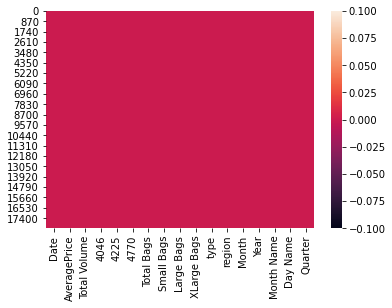

In [15]:
#data visualisation
sns.heatmap(df.isnull())

No null values are present in our dataset

# Exploratory Data Analysis:

In [16]:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
region                  object
Month                    int64
Year                     int64
Month Name              object
Day Name                object
Quarter                  int64
dtype: object

# Univariate Analysis(Numerical Data):

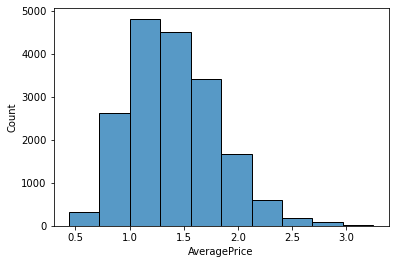

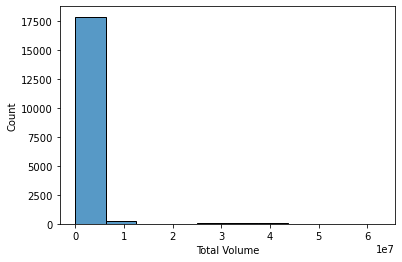

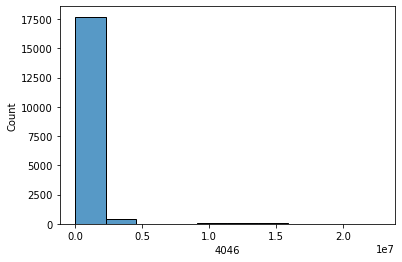

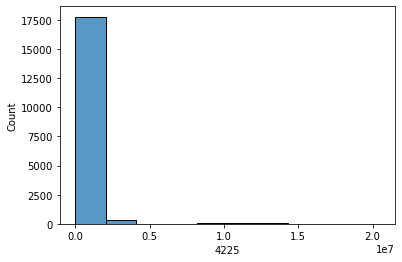

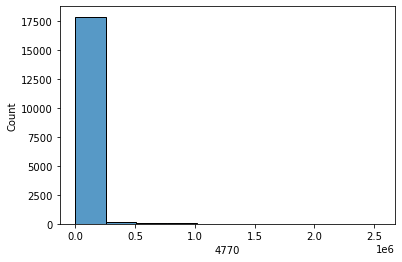

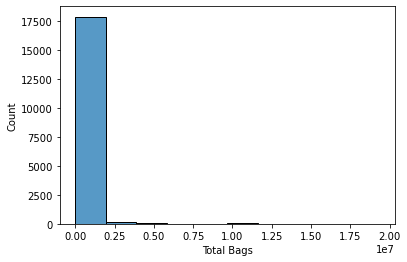

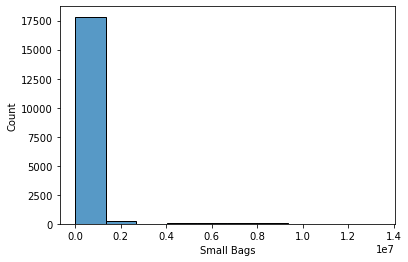

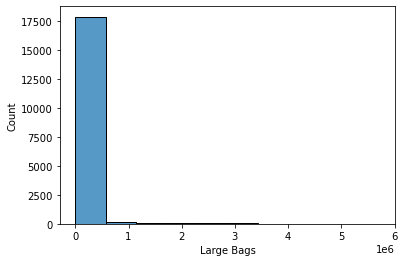

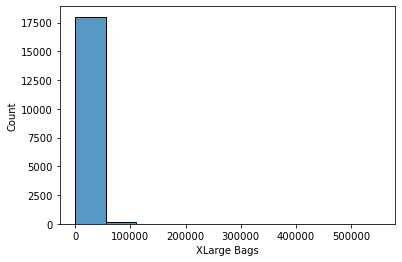

In [17]:
num=['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']
for i in num:
    sns.histplot(data=df,x=i,bins=10)
    plt.show()

Observation:

1.AveragePrice within the range of 1-1.5 have the highest frquency.

2.'Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags seems to be right skewed

# Univariate Analysis(Categorical Data):

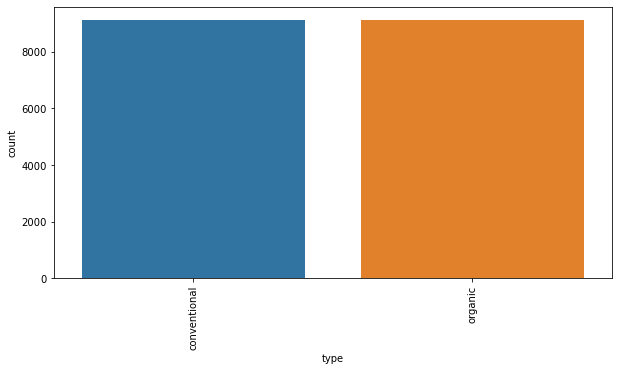

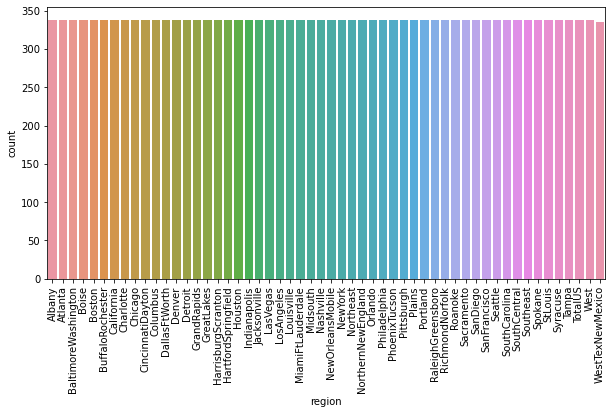

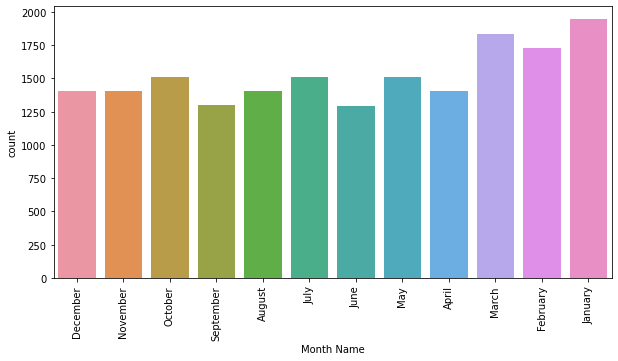

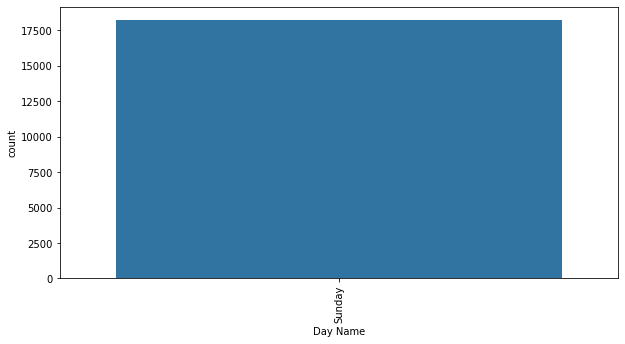

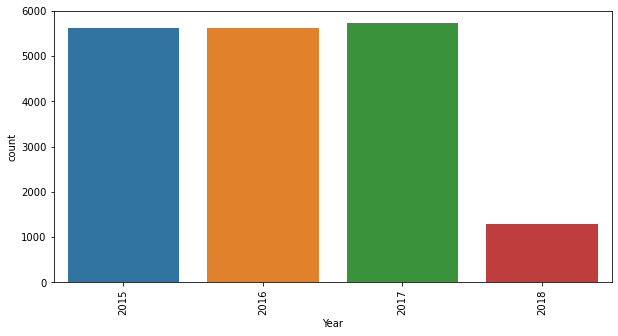

In [18]:
cat=['type','region','Month Name','Day Name','Year']
for i in cat:
    plt.figure(figsize=(10,5))
    sns.countplot(x=i,data=df)
    plt.xticks(rotation=90)
    plt.show()

Observation:
1.In our dataset there is almost equal no. of datas for conventional and organic.

2.In our dataset there is almost equal no. of datas for all regions.

3.Months January,February and march contributes highest amount of data.

4.The dataset comprises all data having day as Sunday.

5.Years 2015,2016 and 2017 contributes highest amount of data.

In [19]:
cat=['type','region','Month Name','Day Name','Year']
for i in cat:
    print(df[i].value_counts())

conventional    9126
organic         9123
Name: type, dtype: int64
Plains                 338
HarrisburgScranton     338
CincinnatiDayton       338
LosAngeles             338
Southeast              338
Orlando                338
Portland               338
Denver                 338
BuffaloRochester       338
Nashville              338
Seattle                338
Chicago                338
Detroit                338
SouthCentral           338
TotalUS                338
Jacksonville           338
Sacramento             338
MiamiFtLauderdale      338
NorthernNewEngland     338
Pittsburgh             338
HartfordSpringfield    338
BaltimoreWashington    338
GreatLakes             338
Albany                 338
NewYork                338
Northeast              338
DallasFtWorth          338
Roanoke                338
NewOrleansMobile       338
PhoenixTucson          338
Tampa                  338
StLouis                338
SouthCarolina          338
Atlanta                338
Boise          

# Bivariate Analysis(Numerical Data):

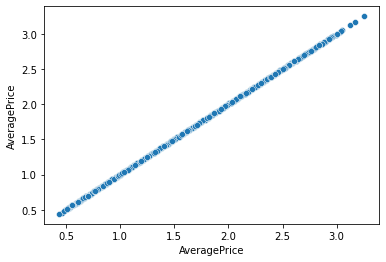

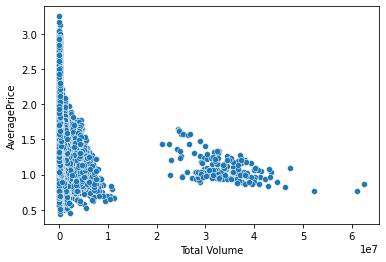

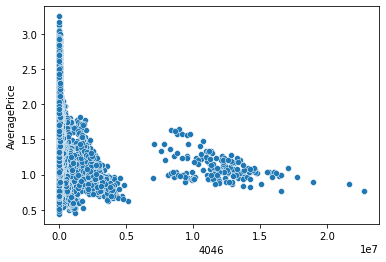

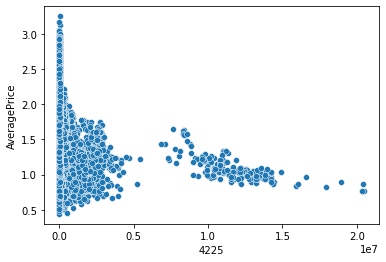

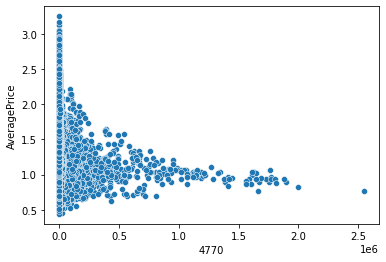

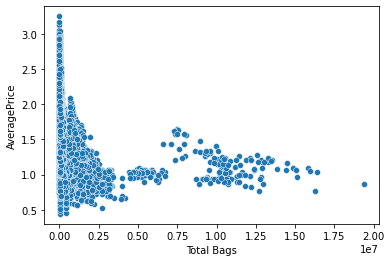

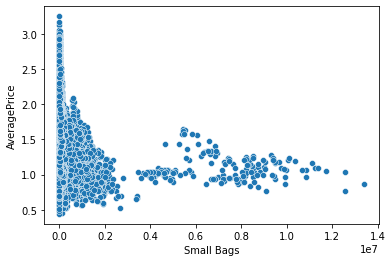

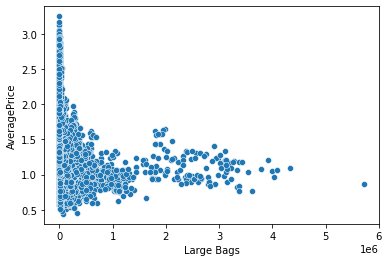

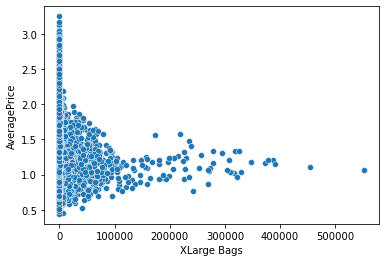

In [20]:
num=['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']
for i in num:
    sns.scatterplot(x=i,y='AveragePrice',data=df)
    plt.show()

Observation:
With increase of 'Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags', the 'AveragePrice' decreases.

# Bivariate Analysis(Categorical Data):

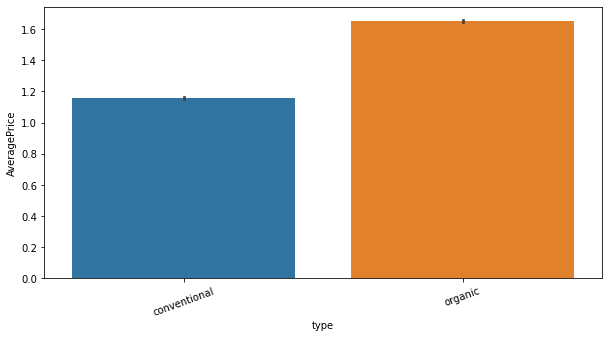

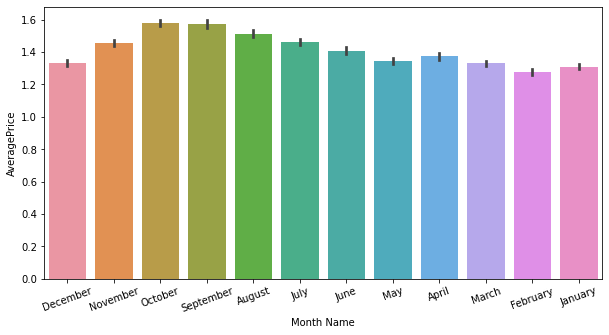

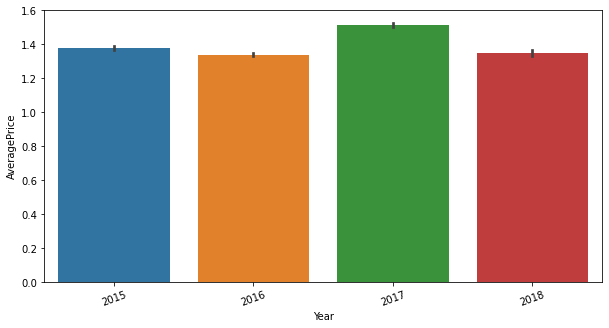

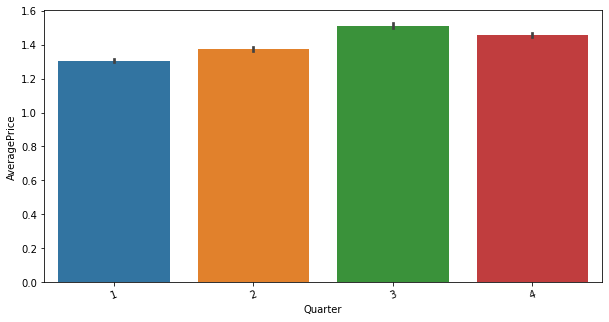

In [21]:
cat=['type','Month Name','Year','Quarter']
for i in cat:
    plt.figure(figsize=(10,5))
    sns.barplot(x=i,y='AveragePrice',data=df)
    plt.xticks(rotation=20)
    plt.show()

Observation:

1.Organic type of avocado has higher price than conventional.

2.The Price of Avocado remains high in the third quarter i.e in the month of July,August and September.

3.2017 year is that year where average price was maximum.

<AxesSubplot:xlabel='type', ylabel='Total Volume'>

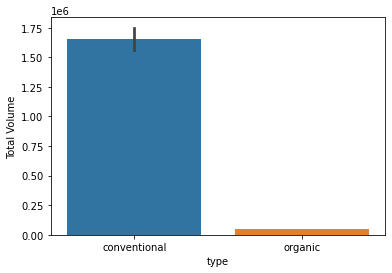

In [22]:
sns.barplot(x='type',y='Total Volume',data=df)

Observation:Convenional type is in more demand than the organic

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'MiamiFtLauderdale'),
  Text(25, 0, 'M

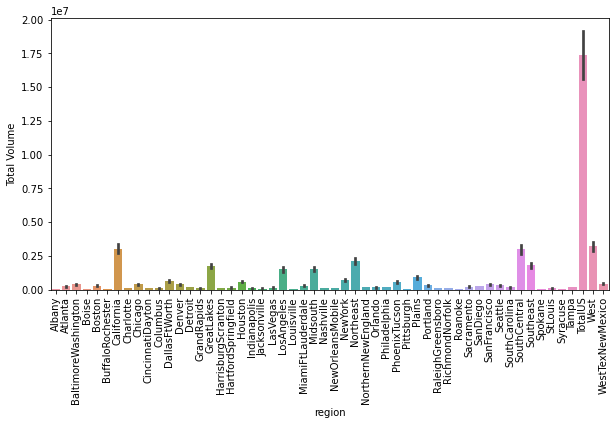

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(x='region',y='Total Volume',data=df)
plt.xticks(rotation=90)

Observation:
Above graph is showing that California,SouthCentral, and west are the region where the demand of avocado is more as compared to other region

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'MiamiFtLauderdale'),
  Text(25, 0, 'M

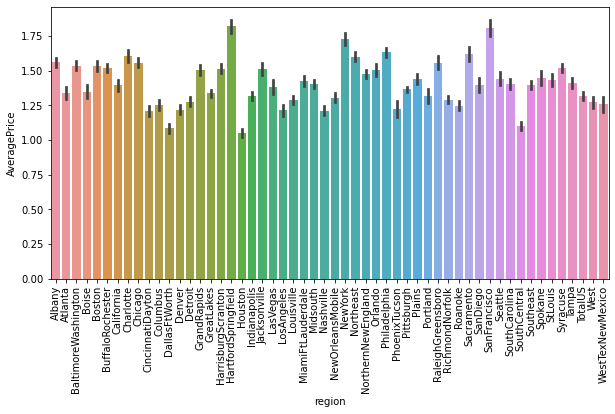

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(x='region',y='AveragePrice',data=df)
plt.xticks(rotation=90)

Observation:
Above graph is showing that HartfordSpringfield ,SanFrancisco and NewYork are having more average price as compared to other region

In [25]:
pd.set_option('display.max_columns', None)

In [26]:
pd.crosstab(df.Year,df.region,values=df.AveragePrice,aggfunc=np.average)

region,Albany,Atlanta,BaltimoreWashington,Boise,Boston,BuffaloRochester,California,Charlotte,Chicago,CincinnatiDayton,Columbus,DallasFtWorth,Denver,Detroit,GrandRapids,GreatLakes,HarrisburgScranton,HartfordSpringfield,Houston,Indianapolis,Jacksonville,LasVegas,LosAngeles,Louisville,MiamiFtLauderdale,Midsouth,Nashville,NewOrleansMobile,NewYork,Northeast,NorthernNewEngland,Orlando,Philadelphia,PhoenixTucson,Pittsburgh,Plains,Portland,RaleighGreensboro,RichmondNorfolk,Roanoke,Sacramento,SanDiego,SanFrancisco,Seattle,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015,1.538750,1.380577,1.368846,1.373750,1.473558,1.544615,1.315865,1.575769,1.404038,1.202308,1.273846,1.077885,1.187788,1.338269,1.416346,1.326250,1.471635,1.747788,1.048077,1.342981,1.503077,1.368846,1.152500,1.294423,1.383558,1.351346,1.277212,1.267692,1.644519,1.543750,1.473365,1.499327,1.555192,1.157115,1.407212,1.437885,1.306827,1.449423,1.274519,1.227115,1.454038,1.274231,1.621058,1.422212,1.454712,1.112019,1.414712,1.400385,1.503365,1.529038,1.356635,1.257404,1.237788,1.259320
2016,1.533942,1.214135,1.587596,1.141923,1.426154,1.483846,1.329904,1.497885,1.547308,1.088365,1.186346,0.996154,1.093173,1.172404,1.509327,1.277019,1.511635,1.851058,0.991923,1.301538,1.367692,1.352404,1.083750,1.211538,1.279808,1.350865,1.116154,1.248654,1.762019,1.595673,1.392692,1.370769,1.674808,1.258750,1.343365,1.377500,1.191635,1.447788,1.211154,1.147500,1.668173,1.313750,1.881250,1.300288,1.305000,1.026923,1.286923,1.333558,1.185481,1.503462,1.264519,1.263558,1.180865,1.246635
2017,1.637830,1.428774,1.679434,1.492642,1.679528,1.587736,1.533868,1.769811,1.714811,1.319434,1.315660,1.176981,1.357736,1.339057,1.627736,1.424623,1.595755,1.888302,1.104057,1.330755,1.671509,1.417830,1.377358,1.357075,1.637547,1.520566,1.240000,1.419057,1.809906,1.694057,1.577170,1.680189,1.707264,1.272547,1.362925,1.510472,1.434340,1.768679,1.399245,1.358302,1.774057,1.584528,1.965943,1.599340,1.479811,1.162830,1.512170,1.604528,1.591792,1.589434,1.619340,1.436604,1.390000,1.281538
2018,1.435833,1.288750,1.378333,1.492500,1.576667,1.226250,1.411250,1.482500,1.561667,1.275833,1.171667,1.102917,1.280833,1.177917,1.328333,1.278333,1.336667,1.677500,1.042083,1.168333,1.456667,1.393750,1.351667,1.267917,1.344167,1.358333,1.222500,1.204167,1.574583,1.474167,1.421250,1.354583,1.448750,1.155000,1.275417,1.359583,1.396250,1.535000,1.235000,1.285833,1.472083,1.477917,1.549583,1.455000,1.268333,1.104583,1.302917,1.425000,1.465833,1.250417,1.330833,1.307083,1.297083,1.251250


Observation: In the year 2017 the average price of avocado was higher and SanFrancisco is the region in which average price was highest

# Data Set Description

In [27]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Month,Year,Quarter
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,6.177215,2016.147899,2.402323
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,3.534130,0.939938,1.147834
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000,2015.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,3.000000,2015.000000,1.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,6.000000,2016.000000,2.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,9.000000,2017.000000,3.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,12.000000,2018.000000,4.000000


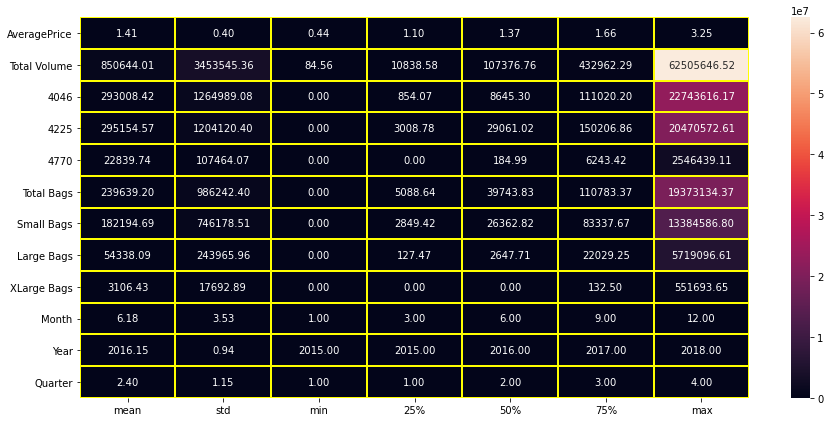

In [28]:
#visualisation
plt.figure(figsize=(15,7))
sns.heatmap(round(df.describe()[1:].transpose(),2),annot=True,linewidth=1,linecolor='yellow',fmt='.2f')
plt.show()

Observation:
1.In all the feature there is a huge difference between 75% and max indicating outliers are present.

2.High values of std indicates datas are highly spreaded.

3.Mean is greater than median indicating right skewness.

# Correlation of columns with target columns

In [29]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Month,Year,Quarter
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.162409,0.093197,0.172177
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.024689,0.017193,-0.025484
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.025803,0.003353,-0.027167
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.022108,-0.009559,-0.022079
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.033424,-0.036531,-0.033886
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.022724,0.071552,-0.023742
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.023126,0.063915,-0.024371
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.020187,0.087891,-0.020424
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.012969,0.081033,-0.014023
Month,0.162409,-0.024689,-0.025803,-0.022108,-0.033424,-0.022724,-0.023126,-0.020187,-0.012969,1.000000,-0.177050,0.972903


<AxesSubplot:>

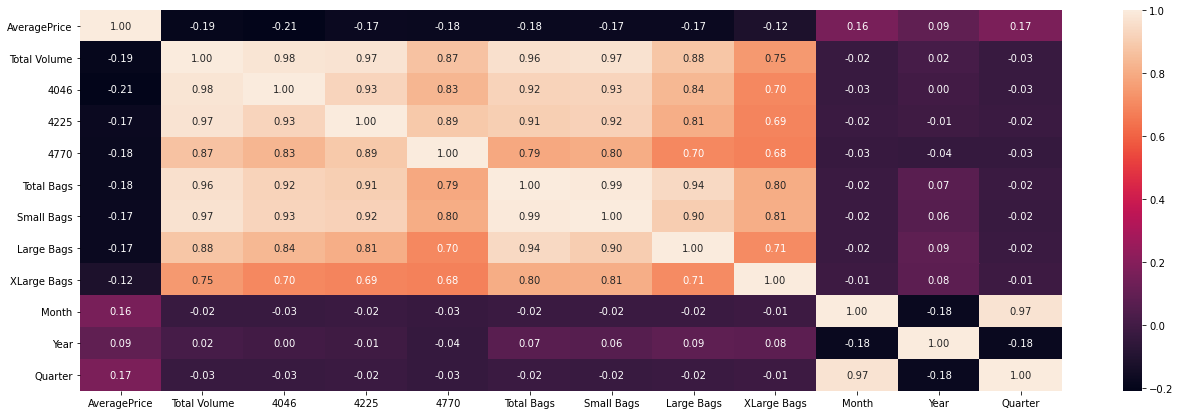

In [30]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linecolor='yellow')

Observation:
All the Features are not correleted with the Average Price column, instead most of them are correlated with each other. 

# Checking Skewness

In [31]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
Month            0.106617
Year             0.215339
Quarter          0.110514
dtype: float64

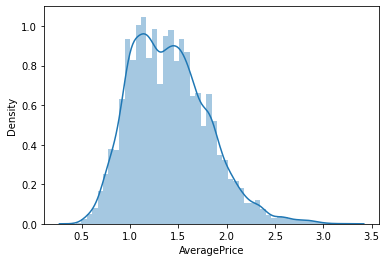

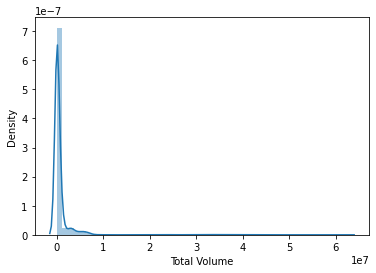

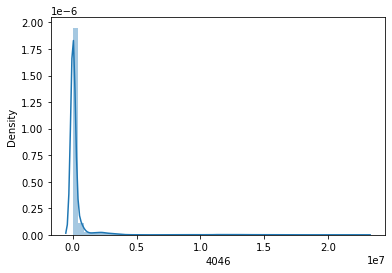

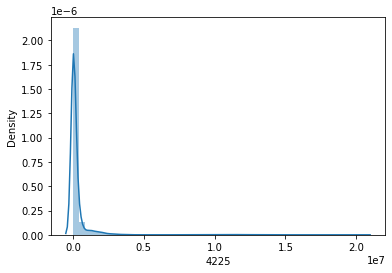

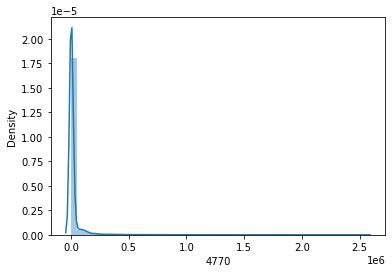

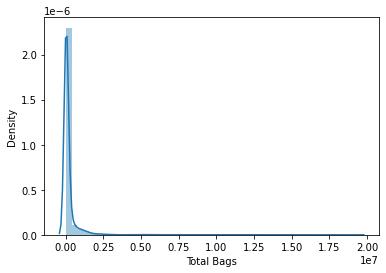

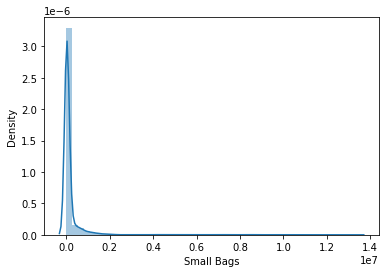

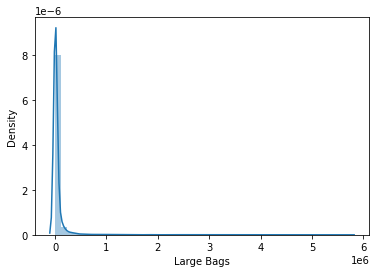

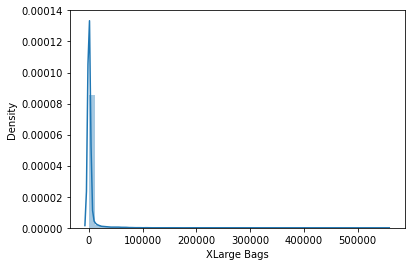

In [32]:
num_attrs=['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']
for i in num_attrs:
    sns.distplot(df[i])
    plt.show()

Observations:
Maximum features are heavily right skewed.

# Outliers Checking:

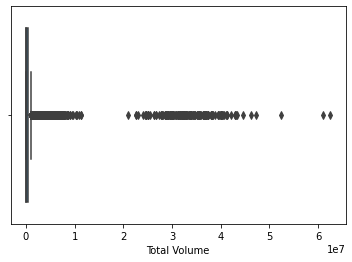

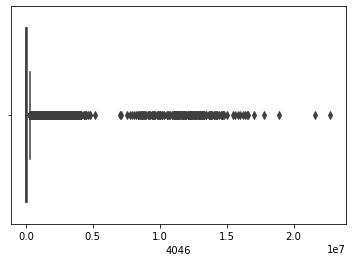

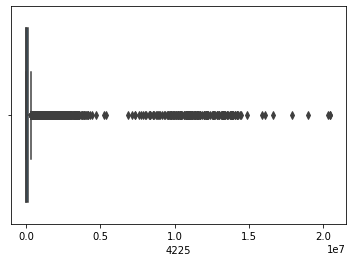

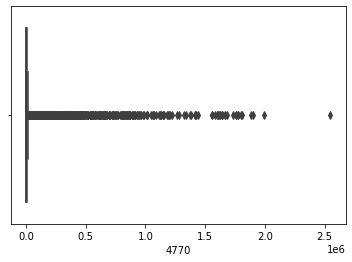

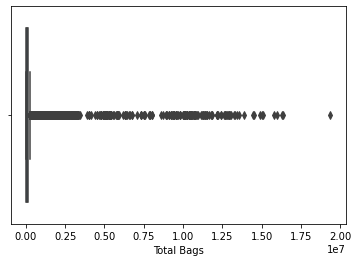

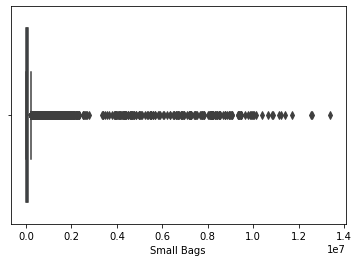

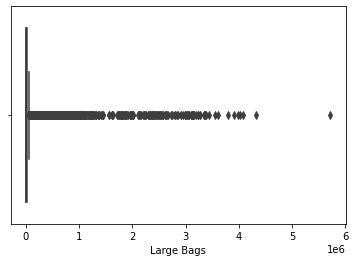

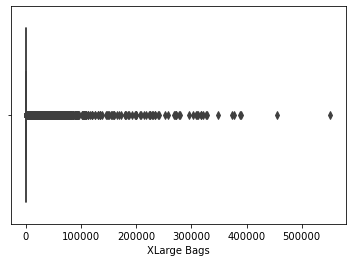

In [33]:
num_attrs=['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']
for i in num_attrs:
    sns.boxplot(df[i],data=df)
    plt.show()

Observations:
Huge no. of Outliers are present in all the columns.

# Checking Multicollinearity

In [34]:
xm=df[['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(xm.values,i) for i in range(xm.shape[1])]
    vif['features']=xm.columns
    print(vif)

In [37]:
vif_calc()

     VIF Factor      features
0  1.040876e+00  AveragePrice
1  5.204434e+09  Total Volume
2  6.936343e+08          4046
3  6.323260e+08          4225
4  4.965750e+06          4770
5  2.502000e+14    Total Bags
6  1.429714e+14    Small Bags
7  1.521486e+13    Large Bags
8  7.854819e+10   XLarge Bags


#Total bags,Small Bags have high VIF

# DATA PREPROCESSING:

In [38]:
#dropping columns which are not useful for predicting the output
#dropping columns with high VIF and least correlated with target
df.drop(['Date','Month Name','Day Name','Total Bags'],axis=1,inplace=True)

# Converting categorical data to numerical data using encoding techniques

In [39]:
from sklearn.preprocessing import LabelEncoder
column = ['type','region']
le = LabelEncoder()
for i in column:
    df[i] = le.fit_transform(df[i].astype(str))

print(df.dtypes)

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
region            int32
Month             int64
Year              int64
Quarter           int64
dtype: object


# REMOVING OUTLIERS:

In [40]:
from scipy.stats import zscore

In [41]:
#calculate the zscore
z = np.abs(zscore(df))
print(z)

[[0.18868864 0.22771641 0.23081597 ... 1.64763162 1.22128204 1.39194422]
 [0.13901962 0.23042664 0.23110251 ... 1.64763162 1.22128204 1.39194422]
 [1.18206895 0.21208462 0.23100731 ... 1.64763162 1.22128204 1.39194422]
 ...
 [1.15237477 0.24233073 0.2306933  ... 1.46495942 1.97050371 1.22174662]
 [1.30138182 0.24162464 0.2304279  ... 1.46495942 1.97050371 1.22174662]
 [0.53151208 0.24125273 0.22934712 ... 1.46495942 1.97050371 1.22174662]]


In [42]:
threshold = 3
print(np.where(z<3))

(array([    0,     0,     0, ..., 18248, 18248, 18248], dtype=int64), array([ 0,  1,  2, ..., 10, 11, 12], dtype=int64))


In [43]:
df_new = df[(z<3).all(axis = 1)]
print(df_new.shape)

(17651, 13)


In [44]:
df.shape[0]

18249

In [45]:
df_new.shape[0]

17651

In [46]:
data_loss=(18249-17651)/18249*100
data_loss

3.276891884486821

Since only 3% data is lost due to ouliers removal we can consider to remove outliers

In [47]:
df=df_new

In [48]:
df.shape

(17651, 13)

# Skewness Treatment:

In [49]:
df.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
region          0.012798
Month           0.107408
Year            0.229976
Quarter         0.110486
dtype: float64

In [50]:
#taking +/- 0.55 as the range of skewness
skew=('Total Volume','4046','4225','4770','Small Bags','Large Bags','XLarge Bags')
for col in skew :
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [51]:
df

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region,Month,Year,Quarter
0,1.33,11.070344,6.944801,10.905146,3.895080,9.060055,4.545951,0.0,0,0,12,2015,4
1,1.35,10.912867,6.515127,10.706381,4.083115,9.149429,4.589955,0.0,0,0,12,2015,4
2,0.93,11.680313,6.679222,11.600485,4.879007,8.992584,4.645736,0.0,0,0,12,2015,4
3,1.08,11.277116,7.032624,11.184108,4.298373,8.644425,4.903495,0.0,0,0,12,2015,4
4,1.28,10.840377,6.848515,10.688288,4.340944,8.697389,5.291746,0.0,0,0,11,2015,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,9.745419,7.624599,7.333154,0.000000,9.477908,6.070391,0.0,1,53,2,2018,1
18245,1.71,9.538855,7.083975,8.141044,0.000000,9.098407,5.786284,0.0,1,53,1,2018,1
18246,1.87,9.530085,7.084159,7.805389,6.591591,9.143431,3.768384,0.0,1,53,1,2018,1
18247,1.93,9.693150,7.332127,8.000363,6.590315,9.298401,3.931826,0.0,1,53,1,2018,1


# Feature Scaling:

In [52]:
#assign the value target and feature
x = df.drop(['AveragePrice'],axis=1)
y = df[["AveragePrice"]]

In [53]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(x)
x = pd.DataFrame(x,columns=x.columns)
x

,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region,Month,Year,Quarter
0,11.070344,6.944801,10.905146,3.895080,9.060055,4.545951,0.0,0,0,12,2015,4
1,10.912867,6.515127,10.706381,4.083115,9.149429,4.589955,0.0,0,0,12,2015,4
2,11.680313,6.679222,11.600485,4.879007,8.992584,4.645736,0.0,0,0,12,2015,4
3,11.277116,7.032624,11.184108,4.298373,8.644425,4.903495,0.0,0,0,12,2015,4
4,10.840377,6.848515,10.688288,4.340944,8.697389,5.291746,0.0,0,0,11,2015,4
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,9.745419,7.624599,7.333154,0.000000,9.477908,6.070391,0.0,1,53,2,2018,1
18245,9.538855,7.083975,8.141044,0.000000,9.098407,5.786284,0.0,1,53,1,2018,1
18246,9.530085,7.084159,7.805389,6.591591,9.143431,3.768384,0.0,1,53,1,2018,1
18247,9.693150,7.332127,8.000363,6.590315,9.298401,3.931826,0.0,1,53,1,2018,1


# Predicting Average Price

# Model Building:

In [54]:
# Since our target is continuous variable we will use regression model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=i)
    lr.fit(x_train,y_train)
    train_pred=lr.predict(x_train)
    test_pred=lr.predict(x_test)
    if round(r2_score(y_train,train_pred),1)==round(r2_score(y_test,test_pred),1):
        print('training score :',r2_score(y_train,train_pred))
        print('testing score :',r2_score(y_test,test_pred))
        print('At random_state=',i,"the model performs well",'\n')

training score : 0.548205065187427
testing score : 0.5351349127077945
At random_state= 0 the model performs well 

training score : 0.546372402393527
testing score : 0.5396169546754901
At random_state= 1 the model performs well 

training score : 0.5469188770637052
testing score : 0.5378826110797954
At random_state= 2 the model performs well 

training score : 0.5448322802617469
testing score : 0.5430283728617608
At random_state= 4 the model performs well 

training score : 0.5446560168746595
testing score : 0.5431335031759221
At random_state= 8 the model performs well 

training score : 0.5458773584429354
testing score : 0.5401654232702309
At random_state= 9 the model performs well 

training score : 0.5420770461617741
testing score : 0.5490466282572057
At random_state= 11 the model performs well 

training score : 0.5436044459106705
testing score : 0.5458106763910684
At random_state= 12 the model performs well 

training score : 0.5425841677450006
testing score : 0.5483217647686844
A

In [55]:
#selecting random_state =68
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=68)
lr.fit(x_train,y_train)
test_pred=lr.predict(x_test)
train_pred=lr.predict(x_train)
print('testing score :',r2_score(y_test,test_pred))
print('training score :',r2_score(y_train,train_pred))
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,test_pred))
print('Mean squared error:',mean_squared_error(y_test,test_pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,test_pred)))

testing score : 0.5416861921453691
training score : 0.5454249842681624
Error:
Mean absolue error: 0.20566011003049414
Mean squared error: 0.06734104846154707
Root Mean squared error: 0.25950153845699464


# Cross Validation Of the Model:

In [56]:
from sklearn.model_selection import cross_val_score
for k in range(2,15):
    cv_score=cross_val_score(lr,x,y,cv=k)
    cv_mean=cv_score.mean()
    print('At crossfold=',k,'the cv score is',cv_mean)
    print('training score :',r2_score(y_train,train_pred))
    print('testing score :',r2_score(y_test,test_pred))
    print('\n')

At crossfold= 2 the cv score is -2.4444672777208076
training score : 0.5454249842681624
testing score : 0.5416861921453691


At crossfold= 3 the cv score is 0.15485822157280948
training score : 0.5454249842681624
testing score : 0.5416861921453691


At crossfold= 4 the cv score is 0.11395304669037856
training score : 0.5454249842681624
testing score : 0.5416861921453691


At crossfold= 5 the cv score is 0.18585443341795752
training score : 0.5454249842681624
testing score : 0.5416861921453691


At crossfold= 6 the cv score is 0.09640387403640477
training score : 0.5454249842681624
testing score : 0.5416861921453691


At crossfold= 7 the cv score is 0.11776298146997667
training score : 0.5454249842681624
testing score : 0.5416861921453691


At crossfold= 8 the cv score is 0.12508058487105828
training score : 0.5454249842681624
testing score : 0.5416861921453691


At crossfold= 9 the cv score is 0.13608770025301073
training score : 0.5454249842681624
testing score : 0.5416861921453691




selecting cv=5 as it is performing better than other values of kfolds 

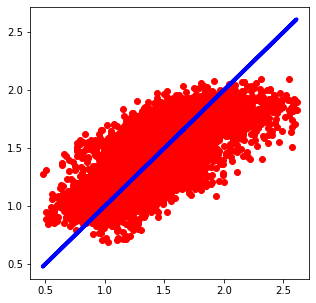

In [57]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,test_pred,color='r')
plt.plot(y_test,y_test,color='b',linewidth='4')
plt.show()

In [58]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [59]:
model=[DecisionTreeRegressor(),KNeighborsRegressor(),LinearRegression(),GradientBoostingRegressor(),RandomForestRegressor(),AdaBoostRegressor()]
for i in model:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=68)
    i.fit(x_train,y_train)
    i_pred=i.predict(x_test)
    train_pred=i.predict(x_train)
    print(i)
    print('testing score :',r2_score(y_test,i_pred))
    print('training score :',r2_score(y_train,train_pred))
    from sklearn.model_selection import cross_val_score
    cv_score=cross_val_score(i,x,y)
    cv_mean=cv_score.mean()
    print('the cv score is',cv_mean)
    print('Error:')
    print('Mean absolue error:',mean_absolute_error(y_test,i_pred))
    print('Mean squared error:',mean_squared_error(y_test,i_pred))
    print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,i_pred)))
    print()
    print()


DecisionTreeRegressor()
testing score : 0.7241549627681912
training score : 1.0
the cv score is -0.2600796900820889
Error:
Mean absolue error: 0.12930891238670697
Mean squared error: 0.040530513595166164
Root Mean squared error: 0.2013219153375165


KNeighborsRegressor()
testing score : 0.8266684171605763
training score : 0.8965040383934533
the cv score is -0.2888341986611553
Error:
Mean absolue error: 0.11456570996978852
Mean squared error: 0.025467987915407858
Root Mean squared error: 0.1595869290243028


LinearRegression()
testing score : 0.5416861921453691
training score : 0.5454249842681624
the cv score is 0.18585443341795752
Error:
Mean absolue error: 0.20566011003049414
Mean squared error: 0.06734104846154707
Root Mean squared error: 0.25950153845699464


GradientBoostingRegressor()
testing score : 0.7368182541234446
training score : 0.7548641392278157
the cv score is 0.3811699212491468
Error:
Mean absolue error: 0.1495079327688276
Mean squared error: 0.0386698685475544
Root Mea

Observation:
    DecisionTree,RandomForest and KNeighbors model performing well.

# TUNING THE MODEL USING GRID SEARCH CV

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
#tuning random forest model
from sklearn.ensemble import RandomForestRegressor
parameters={'n_estimators':[100,200,300,350],'max_features':['auto','sqrt','log2'],'max_depth':[5,10]}
rf=RandomForestRegressor()
rfg=GridSearchCV(rf,parameters)
rfg.fit(x_train,y_train)
print(rfg.best_params_)

{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 200}


In [92]:
rf=RandomForestRegressor(n_estimators=200,max_features='auto',max_depth=10)    
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=68)
rf.fit(x_train,y_train)
rfpred=rf.predict(x_test)
rf.score(x_train,y_train)
cv_score=cross_val_score(rf,x,y,cv=5)
cv_mean=cv_score.mean()
print('The CV score is:',cv_mean)
print('testing score :',r2_score(y_test,rfpred))
print('training score :',rf.score(x_train,y_train))
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,rfpred))
print('Mean squared error:',mean_squared_error(y_test,rfpred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,rfpred)))

The CV score is: 0.2232459878908931
testing score : 0.8301974453530455
training score : 0.8940002833420375
Error:
Mean absolue error: 0.11655784855713527
Mean squared error: 0.024949460097876727
Root Mean squared error: 0.15795398094975868


In [93]:
#kneighbors 
parameters={'n_neighbors':[2,3,5,10,15,20,25,30,35]}
knr=KNeighborsRegressor()
knrg=GridSearchCV(knr,parameters)
knrg.fit(x_train,y_train)
print(knrg.best_params_)

{'n_neighbors': 2}


In [94]:
knr=KNeighborsRegressor(n_neighbors=2)
knr.fit(x_train,y_train)
knrpred=knr.predict(x_test)
knr.score(x_train,y_train)
cv_score=cross_val_score(knr,x,y,cv=5)
cv_mean=cv_score.mean()
print('The CV score is:',cv_mean)
print('testing score :',r2_score(y_test,knrpred))
print('training score :',knr.score(x_train,y_train))
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,knrpred))
print('Mean squared error:',mean_squared_error(y_test,knrpred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,knrpred)))

The CV score is: -0.39530792230131445
testing score : 0.8411281587120777
training score : 0.9562660455283667
Error:
Mean absolue error: 0.10544278700906344
Mean squared error: 0.02334338651812689
Root Mean squared error: 0.15278542639311804


In [65]:
#tuning decision tree model
parameters={'criterion':['squared_error','friedman_mse','absolute_error','poisson'],'max_features':['auto','sqrt','log2'],'max_depth':[5,10]}
dtr=DecisionTreeRegressor()
dtr=GridSearchCV(dtr,parameters)
dtr.fit(x_train,y_train)
print(dtr.best_params_)

{'criterion': 'squared_error', 'max_depth': 10, 'max_features': 'auto'}


In [66]:
dtr=DecisionTreeRegressor(criterion='friedman_mse',max_depth=10,max_features='auto')
dtr.fit(x_train,y_train)
dtrpred=knr.predict(x_test)
dtr.score(x_train,y_train)
cv_score=cross_val_score(dtr,x,y,cv=5)
cv_mean=cv_score.mean()
print('The CV score is:',cv_mean)
print('testing score :',r2_score(y_test,dtrpred))
print('training score :',dtr.score(x_train,y_train))
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,dtrpred))
print('Mean squared error:',mean_squared_error(y_test,dtrpred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,dtrpred)))

The CV score is: -0.13731790851177197
testing score : 0.8266684171605763
training score : 0.8453501283129471
Error:
Mean absolue error: 0.11456570996978852
Mean squared error: 0.025467987915407858
Root Mean squared error: 0.1595869290243028


# CONCLUSION:

Comparing the performance metrics we selecting KNR as our final model as it is very perforing better in comparison to other model

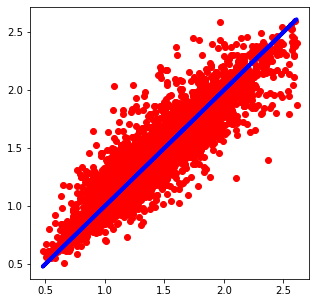

In [95]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,knrpred,color='r')
plt.plot(y_test,y_test,color='b',linewidth='4')
plt.show()

In [102]:
roriginal=np.array(y_test)
rpredicted=np.array(knrpred)

In [103]:
orr=np.reshape(roriginal,(np.product(roriginal.shape),))
orr.shape

(5296,)

In [104]:
predict=np.reshape(rpredicted,(np.product(rpredicted.shape),))
predict.shape

(5296,)

In [105]:
df_comp=pd.DataFrame({'Original':orr,'Predicted':predict},index=range(len(orr)))
df_comp

,Original,Predicted
0,1.66,1.200
1,0.91,1.305
2,2.45,2.175
3,1.81,1.795
4,1.48,1.200
...,...,...
5291,1.44,1.400
5292,1.29,1.120
5293,1.46,1.440
5294,1.12,1.485


# Predicting Region

In [72]:
#assign the value target and feature
xc = df.drop(['region'],axis=1)
yc = df["region"]

In [73]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
from sklearn.preprocessing import StandardScaler
scc = StandardScaler()
scc.fit_transform(xc)
xc = pd.DataFrame(xc,columns=xc.columns)
xc

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,Month,Year,Quarter
0,1.33,11.070344,6.944801,10.905146,3.895080,9.060055,4.545951,0.0,0,12,2015,4
1,1.35,10.912867,6.515127,10.706381,4.083115,9.149429,4.589955,0.0,0,12,2015,4
2,0.93,11.680313,6.679222,11.600485,4.879007,8.992584,4.645736,0.0,0,12,2015,4
3,1.08,11.277116,7.032624,11.184108,4.298373,8.644425,4.903495,0.0,0,12,2015,4
4,1.28,10.840377,6.848515,10.688288,4.340944,8.697389,5.291746,0.0,0,11,2015,4
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,9.745419,7.624599,7.333154,0.000000,9.477908,6.070391,0.0,1,2,2018,1
18245,1.71,9.538855,7.083975,8.141044,0.000000,9.098407,5.786284,0.0,1,1,2018,1
18246,1.87,9.530085,7.084159,7.805389,6.591591,9.143431,3.768384,0.0,1,1,2018,1
18247,1.93,9.693150,7.332127,8.000363,6.590315,9.298401,3.931826,0.0,1,1,2018,1


In [74]:
yc

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 17651, dtype: int32

# Model Building:

In [75]:
# Since our target is categorical variable we will use classification model
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [76]:
#finding out the best random state

model = [DecisionTreeClassifier()]
maxaccuracy_score=0
for i in range(0,100):
    xc_train,xc_test,yc_train,yc_test=train_test_split(xc,yc,test_size=.3,random_state=i)
    for i_c in model:
        i_c.fit(xc_train,yc_train)
        pre_c = i_c.predict(xc_test)
        ac_score = accuracy_score(yc_test,pre_c)
        print("accuracy score correspond to random state " ,i ,"is", ac_score)
        

accuracy score correspond to random state  0 is 0.7788897280966768
accuracy score correspond to random state  1 is 0.7902190332326284
accuracy score correspond to random state  2 is 0.7892749244712991
accuracy score correspond to random state  3 is 0.7992824773413897
accuracy score correspond to random state  4 is 0.7945619335347432
accuracy score correspond to random state  5 is 0.7915407854984894
accuracy score correspond to random state  6 is 0.7987160120845922
accuracy score correspond to random state  7 is 0.7951283987915407
accuracy score correspond to random state  8 is 0.7945619335347432
accuracy score correspond to random state  9 is 0.7837990936555891
accuracy score correspond to random state  10 is 0.7885196374622356
accuracy score correspond to random state  11 is 0.7883308157099698
accuracy score correspond to random state  12 is 0.7902190332326284
accuracy score correspond to random state  13 is 0.7970166163141994
accuracy score correspond to random state  14 is 0.7941842

In [77]:
#selecting random state=58
dtc=DecisionTreeClassifier()
xc_train,xc_test,yc_train,yc_test=train_test_split(xc,yc,random_state=58,test_size=0.30)
dtc.fit(xc_train,yc_train)
pred_train=dtc.predict(xc_train)
pred_test=dtc.predict(xc_test)
print('Training Accuracy Score is:',round(accuracy_score(yc_train,pred_train)*100,1))
print('Testing Accuracy Score is:',round(accuracy_score(yc_test,pred_test)*100,1))

Training Accuracy Score is: 100.0
Testing Accuracy Score is: 79.5


# CROSS VALIDATION OF THE MODEL

In [78]:
from sklearn.model_selection import cross_val_score
for k in range(2,25):
    cv_score=cross_val_score(dtc,xc,yc,cv=k)
    cv_mean=cv_score.mean()
    print('At crossfold=',k,'the cv score is',cv_mean)
    print('training score :',accuracy_score(yc_train,pred_train))
    print('testing score :',accuracy_score(yc_test,pred_test))
    print('\n')

At crossfold= 2 the cv score is 0.07682154001600987
training score : 1.0
testing score : 0.7953172205438066


At crossfold= 3 the cv score is 0.432492771365057
training score : 1.0
testing score : 0.7953172205438066


At crossfold= 4 the cv score is 0.4865980529380453
training score : 1.0
testing score : 0.7953172205438066


At crossfold= 5 the cv score is 0.5466570553166089
training score : 1.0
testing score : 0.7953172205438066


At crossfold= 6 the cv score is 0.5405881536214175
training score : 1.0
testing score : 0.7953172205438066


At crossfold= 7 the cv score is 0.6090187390236054
training score : 1.0
testing score : 0.7953172205438066


At crossfold= 8 the cv score is 0.6120788404651647
training score : 1.0
testing score : 0.7953172205438066


At crossfold= 9 the cv score is 0.6084013735043681
training score : 1.0
testing score : 0.7953172205438066


At crossfold= 10 the cv score is 0.6306705828379302
training score : 1.0
testing score : 0.7953172205438066


At crossfold= 11 t

In [79]:
#selecting cv=25
model=[DecisionTreeClassifier(),KNeighborsClassifier(),GradientBoostingClassifier(),RandomForestClassifier(),AdaBoostClassifier(),SVC()]
for i in model:
    xc_train,xc_test,yc_train,yc_test=train_test_split(xc,yc,test_size=.3,random_state=58)
    i.fit(xc_train,yc_train)
    i_pred=i.predict(xc_test)
    train_pred=i.predict(xc_train)
    print(i)
    print('testing score :',accuracy_score(yc_test,i_pred))
    print('training score :',accuracy_score(yc_train,train_pred))
    
    print()


DecisionTreeClassifier()
testing score : 0.797583081570997
training score : 1.0

KNeighborsClassifier()
testing score : 0.7815332326283988
training score : 0.8759206798866855

GradientBoostingClassifier()
testing score : 0.8242069486404834
training score : 0.9858356940509915

RandomForestClassifier()
testing score : 0.9178625377643505
training score : 1.0

AdaBoostClassifier()
testing score : 0.08289274924471299
training score : 0.08579522460542291

SVC()
testing score : 0.01623867069486405
training score : 0.020396600566572238



# HYPER PARAMETER TUNING USING GRID SEARCH CV

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
#tuning random forest model
from sklearn.ensemble import RandomForestClassifier
parameters={'n_estimators':[100,200,300,350],'max_features':['auto','sqrt','log2'],'max_depth':[5,10]}
rfc=RandomForestClassifier()
rfcg=GridSearchCV(rf,parameters)
rfg .fit(xc_train,yc_train)
print(rfg.best_params_)

{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 350}


In [91]:
rfc=RandomForestClassifier(max_depth=10,max_features='auto',n_estimators=350)
xc_train,xc_test,yc_train,yc_test=train_test_split(xc,yc,test_size=.3,random_state=58)
rfc.fit(xc_train,yc_train)
rfc_pred=rfc.predict(xc_test)
train_pred=rfc.predict(xc_train)
print('testing score :',accuracy_score(yc_test,rfc_pred))
print('training score :',accuracy_score(yc_train,train_pred))

testing score : 0.8140105740181269
training score : 0.8760016187778228


In [83]:
#tuning decision tree model
parameters={'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2'],'max_depth':[5,10]}
dtc=DecisionTreeClassifier()
dtc=GridSearchCV(dtc,parameters)
dtc.fit(xc_train,yc_train)
print(dtc.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt'}


In [84]:
dtc=DecisionTreeClassifier(max_depth=10,max_features='auto',criterion='entropy')
xc_train,xc_test,yc_train,yc_test=train_test_split(xc,yc,test_size=.3,random_state=58)
dtc.fit(xc_train,yc_train)
dtc_pred=dtc.predict(xc_test)
train_pred=dtc.predict(xc_train)
print('testing score :',accuracy_score(yc_test,dtc_pred))
print('training score :',accuracy_score(yc_train,train_pred))

testing score : 0.6023413897280967
training score : 0.6834479967624444


# CONCLUSION:

Selecting Random Forest as our final model as the model is performing extremely well having training and testing score almost equal.

In [85]:
original=np.array(yc_test)
predicted=np.array(rfc_pred)

In [86]:
original

array([10, 18, 32, ..., 41, 42, 33])

In [87]:
predicted

array([10, 18, 32, ..., 41, 42, 33])

# CONCLUSION:

Selecting random forest as our final model as the model is performing well.

In [88]:
df_com=pd.DataFrame({'Original':original,'Predicted':predicted},index=range(len(original)))
df_com

,Original,Predicted
0,10,10
1,18,18
2,32,32
3,14,14
4,20,20
...,...,...
5291,34,34
5292,9,9
5293,41,41
5294,42,42


# SAVING BEST MODEL

In [89]:
import joblib
joblib.dump(rfc,'rfcfile.obj')

['rfcfile.obj']

In [90]:
joblib.dump(rf,'rffile.obj')

['rffile.obj']